https://github.com/zaidalyafeai/AttentioNN/blob/master/Attention_Maps.ipynb

In [1]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import numpy as np
from keras.applications.resnet50 import preprocess_input

C:\Users\jianghaitao1\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\jianghaitao1\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\jianghaitao1\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\jian

In [2]:
# 预训练模型
resnet_50 = tf.keras.applications.ResNet50(input_shape=(224,224,3),include_top=False,weights='imagenet')

C:\Users\jianghaitao1\AppData\Local\Continuum\anaconda3\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


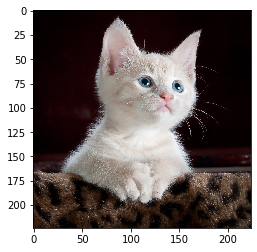

In [12]:
img = cv2.imread("../../dataset/cat.jpg")[:,:,::-1]
img = cv2.resize(img, (224, 224))
ax = plt.imshow(img)

In [13]:
# 预处理
def preprocess(img):
    img = preprocess_input(img)
    # 扩展维度
    return np.expand_dims(img,0)

In [14]:
input_image = preprocess(img)

In [15]:
input_image.shape

(1, 224, 224, 3)

In [24]:
def get_activations_at(input_image, i):
    # index the layer
    out_layer = resnet_50.layers[i]

    # change the output of the model
    model = tf.keras.models.Model(
        inputs=resnet_50.inputs, outputs=out_layer.output)

    # return the activations
    return model.predict(input_image)

In [25]:
def postprocess_activations(activations):

    # using the approach in https://arxiv.org/abs/1612.03928
    output = np.abs(activations)
    output = np.sum(output, axis=-1).squeeze()

    # resize and convert to image
    output = cv2.resize(output, (224, 224))
    output /= output.max()
    output *= 255
    return 255 - output.astype('uint8')

In [26]:
# 生成热力图
def apply_heatmap(weights, img):
    # generate heat maps
    heatmap = cv2.applyColorMap(weights, cv2.COLORMAP_JET)
    heatmap = cv2.addWeighted(heatmap, 0.7, img, 0.3, 0)
    return heatmap

In [27]:
def plot_heatmaps(rng):
    level_maps = None

    # given a range of indices generate the heat maps
    for i in rng:
        activations = get_activations_at(input_image, i)
        weights = postprocess_activations(activations)
        heatmap = apply_heatmap(weights, img)
        if level_maps is None:
            level_maps = heatmap
        else:
            level_maps = np.concatenate([level_maps, heatmap], axis=1)
    plt.figure(figsize=(15, 15))
    plt.axis('off')
    ax = plt.imshow(level_maps)

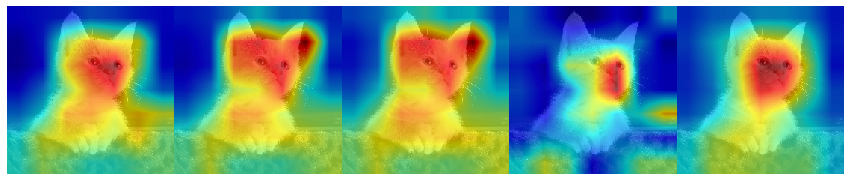

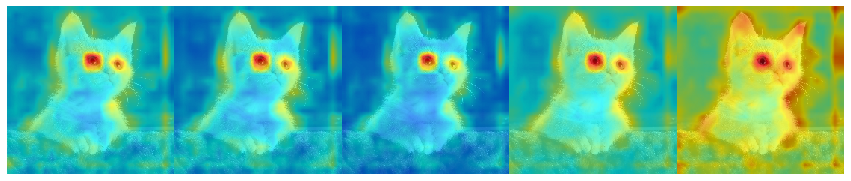

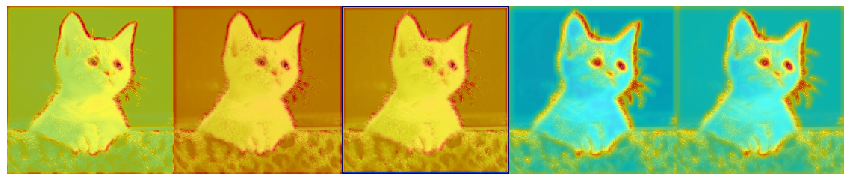

In [28]:
plot_heatmaps(range(164, 169))
plot_heatmaps(range(76, 81))
plot_heatmaps(range(3, 8))